In [1]:
import cv2
cv2.__version__

'4.8.1'

In [1]:
import cv2 			#引入opencv函式庫
img = cv2.imread('star1.png')	# 讀取圖檔
cv2.imshow('My Image',img)   # 顯示圖片,第一個參數是視窗的名字,第二個參數是圖檔的變數名稱
cv2.waitKey(0)  #參數是等待時間（單位為毫秒），若設定為 0 就表示持續等待至使用者按下任按鍵
cv2.destroyAllWindows()	         #按下任意鍵後關閉所有 OpenCV 的視窗.


In [2]:
#程式二:啟動鏡頭

import numpy as np
import cv2

cap = cv2.VideoCapture(0)

while(True):
    ret, frame = cap.read()#傳回值有兩個,第一個是否有讀到圖片,值為True或False,第二個是擷取當前的一禎圖片
    cv2.imshow('frame',frame)
    if cv2.waitKey(5) == ord('q'):
        break
cap.release()
cv2.destroyAllWindows()


In [1]:
#程式三:按按鍵擷取圖檔

import cv2
cap = cv2.VideoCapture(0)       
while(True):
    ret, frame = cap.read()
    cv2.imshow("frame", frame)     
    if cv2.waitKey(1) == ord('q'):   
        cv2.imwrite("ADT110101.png", frame) #儲存路徑
        break

cap.release()
cv2.destroyAllWindows()

In [2]:
#程式四:靜態人臉辨識
import cv2
face_cascade = cv2.CascadeClassifier('haarcascade_frontalface_default.xml') # 載入分類器

img = cv2.imread('star2.png')# 轉成灰階圖片
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# 偵測臉部
faces = face_cascade.detectMultiScale(gray,scaleFactor=1.08,minNeighbors=18,minSize=(32, 32)) # 繪製人臉部份的方框
for (x, y, w, h) in faces: 
    cv2.rectangle(img, (x, y), (x + w, y + h), (0, 0, 255), 2) #(0, 255, 0)欄位可以變更方框顏色(Blue,Green,Red)# 顯示成果

cv2.namedWindow('img', cv2.WINDOW_NORMAL)  #正常視窗大小
cv2.imshow('img', img)                     #秀出圖片
cv2.imwrite( "result.jpg", img )           #保存圖片
cv2.waitKey(0)                             #等待按下任一按鍵
cv2.destroyAllWindows()                    #關閉視窗

faces 

array([[729,  84, 108, 108],
       [425,  89, 100, 100],
       [ 89,  94, 118, 118]])

In [19]:
#程式五:動態人臉辨識

import cv2# 載入分類器

face_cascade = cv2.CascadeClassifier('haarcascade_frontalface_default.xml')
# 從視訊鏡頭擷取影片
cap = cv2.VideoCapture(0)
while True:
    # Read the frame
    _, img = cap.read()
# 轉成灰階
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
# 偵測臉部
    faces = face_cascade.detectMultiScale(gray, 1.1, 4)
# 繪製人臉部份的方框
    for (x, y, w, h) in faces:
        cv2.rectangle(img, (x, y), (x+w, y+h), (0, 255, 0), 2)
# 顯示成果
    cv2.namedWindow('img', cv2.WINDOW_NORMAL)  #正常視窗大小
    cv2.imshow('img', img)                     #秀出圖片
    if cv2.waitKey(30)== ord('q'):
        break
cap.release()
cv2.destroyAllWindows()

In [3]:
#程式六:動態人臉辨識 ＋ 人臉自動儲存 ＋ 自動裁切

import cv2# 載入分類器

face_cascade = cv2.CascadeClassifier('haarcascade_frontalface_default.xml')
# 從視訊鏡頭擷取影片
cap = cv2.VideoCapture(0)
while True:
    # Read the frame
    _, img = cap.read()
# 轉成灰階
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
# 偵測臉部
    faces = face_cascade.detectMultiScale(gray, 1.1, 4)
    
    i=1
# 繪製人臉部份的方框
    for (x, y, w, h) in faces:
        cv2.rectangle(img, (x, y), (x+w, y+h), (0, 255, 0), 2)
        crop_img=img[y:y+h, x:x+w]
        cv2.imwrite("people"+str(i)+".png", crop_img) 
        i = i + 1
# 顯示成果

    cv2.namedWindow('Human Face Found!', cv2.WINDOW_NORMAL)  #正常視窗大小
    cv2.imshow('Human Face Found!', img)#秀出圖片
    
    if cv2.waitKey(30)== ord('s'):
        cv2.imwrite("save.png",img)
    if cv2.waitKey(30)== ord('q'):
        break
cap.release()
cv2.destroyAllWindows()

print(faces)
print('偵測到 {0}人臉 !'.format(len(faces)))

[[269 255 211 211]
 [526 321  64  64]]
偵測到 2人臉 !


In [3]:
import cv2

cap = cv2.VideoCapture(0)

while True:
    ret, frame = cap.read()
    cv2.imshow("frame", frame)

    key = cv2.waitKey(1)

    if key == ord('a'):
        cv2.imwrite("ADT110101.png", frame)  # Save the current frame as a PNG file
        print("Image saved.")

    elif key == ord('q'):
        break  # Break the loop if 'q' key is pressed

cap.release()
cv2.destroyAllWindows()


Image saved.
Image saved.
Image saved.
Image saved.
Image saved.
Image saved.
Image saved.
Image saved.


In [4]:
import cv2

cap = cv2.VideoCapture(0)
frame_counter = 0  # Counter to keep track of frame number

while True:
    ret, frame = cap.read()
    cv2.imshow("frame", frame)

    key = cv2.waitKey(1)

    if key == ord('a'):
        frame_counter += 1
        filename = f"frame_{frame_counter:03d}.png"
        cv2.imwrite(filename, frame)
        print(f"Image {filename} saved.")

    elif key == ord('q'):
        break  # Break the loop if 'q' key is pressed

cap.release()
cv2.destroyAllWindows()


Image frame_001.png saved.
Image frame_002.png saved.
Image frame_003.png saved.
Image frame_004.png saved.
Image frame_005.png saved.
Image frame_006.png saved.
Image frame_007.png saved.
Image frame_008.png saved.
Image frame_009.png saved.
Image frame_010.png saved.
Image frame_011.png saved.


In [5]:
#把截圖檔儲存至imagedata的資料夾
import cv2
import os

cap = cv2.VideoCapture(0)
frame_counter = 0  # Counter to keep track of frame number

# Create a folder named "imagedata" if it doesn't exist
folder_name = "imagedata"
os.makedirs(folder_name, exist_ok=True)

while True:
    ret, frame = cap.read()
    cv2.imshow("frame", frame)

    key = cv2.waitKey(1)

    if key == ord('a'):
        frame_counter += 1
        filename = os.path.join(folder_name, f"frame_{frame_counter:03d}.png")
        cv2.imwrite(filename, frame)
        print(f"Image {filename} saved.")

    elif key == ord('q'):
        break  # Break the loop if 'q' key is pressed

cap.release()
cv2.destroyAllWindows()


Image imagedata\frame_001.png saved.
Image imagedata\frame_002.png saved.
Image imagedata\frame_003.png saved.
Image imagedata\frame_004.png saved.
Image imagedata\frame_005.png saved.


In [7]:
import cv2
import mediapipe as mp
import math
import numpy as np

mp_drawing = mp.solutions.drawing_utils
mp_drawing_styles = mp.solutions.drawing_styles
mp_hands = mp.solutions.hands

# 根據兩點的座標，計算角度
def vector_2d_angle(v1, v2):
    v1_x = v1[0]
    v1_y = v1[1]
    v2_x = v2[0]
    v2_y = v2[1]
    try:
        angle_= math.degrees(math.acos((v1_x*v2_x+v1_y*v2_y)/(((v1_x**2+v1_y**2)**0.5)*((v2_x**2+v2_y**2)**0.5))))
    except:
        angle_ = 180
    return angle_

# 根據傳入的 21 個節點座標，得到該手指的角度
def hand_angle(hand_):
    angle_list = []
    # thumb 大拇指角度
    angle_ = vector_2d_angle(
        ((int(hand_[0][0])- int(hand_[2][0])),(int(hand_[0][1])-int(hand_[2][1]))),
        ((int(hand_[3][0])- int(hand_[4][0])),(int(hand_[3][1])- int(hand_[4][1])))
        )
    angle_list.append(angle_)
    # index 食指角度
    angle_ = vector_2d_angle(
        ((int(hand_[0][0])-int(hand_[6][0])),(int(hand_[0][1])- int(hand_[6][1]))),
        ((int(hand_[7][0])- int(hand_[8][0])),(int(hand_[7][1])- int(hand_[8][1])))
        )
    angle_list.append(angle_)
    # middle 中指角度
    angle_ = vector_2d_angle(
        ((int(hand_[0][0])- int(hand_[10][0])),(int(hand_[0][1])- int(hand_[10][1]))),
        ((int(hand_[11][0])- int(hand_[12][0])),(int(hand_[11][1])- int(hand_[12][1])))
        )
    angle_list.append(angle_)
    # ring 無名指角度
    angle_ = vector_2d_angle(
        ((int(hand_[0][0])- int(hand_[14][0])),(int(hand_[0][1])- int(hand_[14][1]))),
        ((int(hand_[15][0])- int(hand_[16][0])),(int(hand_[15][1])- int(hand_[16][1])))
        )
    angle_list.append(angle_)
    # pink 小拇指角度
    angle_ = vector_2d_angle(
        ((int(hand_[0][0])- int(hand_[18][0])),(int(hand_[0][1])- int(hand_[18][1]))),
        ((int(hand_[19][0])- int(hand_[20][0])),(int(hand_[19][1])- int(hand_[20][1])))
        )
    angle_list.append(angle_)
    return angle_list

# 根據手指角度的串列內容，返回對應的手勢名稱
def hand_pos(finger_angle):
    f1 = finger_angle[0]   # 大拇指角度
    f2 = finger_angle[1]   # 食指角度
    f3 = finger_angle[2]   # 中指角度
    f4 = finger_angle[3]   # 無名指角度
    f5 = finger_angle[4]   # 小拇指角度

    # 小於 50 表示手指伸直，大於等於 50 表示手指捲縮
    if f1>=50 and f2<50 and f3>=50 and f4>=50 and f5>=50:
        return '1'
    else:
        return ''

cap = cv2.VideoCapture(0)            # 讀取攝影機
fontFace = cv2.FONT_HERSHEY_SIMPLEX  # 印出文字的字型
lineType = cv2.LINE_AA               # 印出文字的邊框

# mediapipe 啟用偵測手掌
with mp_hands.Hands(
    model_complexity=0,
    min_detection_confidence=0.5,
    min_tracking_confidence=0.5) as hands:

    if not cap.isOpened():
        print("Cannot open camera")
        exit()
    w, h = 540, 310                                        # 影像尺寸
    draw = np.zeros((h,w,4), dtype='uint8')                # 繪製全黑背景，尺寸和影像相同
    dots = []                                              # 使用 dots 空串列記錄繪圖座標點
    cv2.circle(draw, (40, 40), 20, (0, 0, 255, 255), -1)  # 在画布上绘制一个红色实心圆形
    cv2.circle(draw, (100, 40), 20, (0, 255, 0, 255), -1)  # 在画布上绘制一个绿色实心圆形
    cv2.circle(draw, (160, 40), 20, (255, 0, 0, 255), -1)  # 在画布上绘制一个蓝色实心圆形

    color = (0,0,255,255)                                  # 設定預設顏色為紅色
    while True:
        ret, img = cap.read()
        img = cv2.resize(img, (w,h))                       # 縮小尺寸，加快處理效率
        img = cv2.flip(img, 1)
        if not ret:
            print("Cannot receive frame")
            break
        img2 = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)        # 偵測手勢的影像轉換成 RGB 色彩
        img = cv2.cvtColor(img, cv2.COLOR_BGR2BGRA)        # 畫圖的影像轉換成 BGRA 色彩
        results = hands.process(img2)                      # 偵測手勢
        if results.multi_hand_landmarks:
            for hand_landmarks in results.multi_hand_landmarks:
                finger_points = []                         # 記錄手指節點座標的串列
                for i in hand_landmarks.landmark:
                    # 將 21 個節點換算成座標，記錄到 finger_points
                    x = i.x*w
                    y = i.y*h
                    finger_points.append((x,y))
                if finger_points:
                    finger_angle = hand_angle(finger_points) # 計算手指角度，回傳長度為 5 的串列
                    text = hand_pos(finger_angle)            # 取得手勢所回傳的內容
                    if text == '1':
                        fx = int(finger_points[8][0])        # 如果手勢為 1，記錄食指末端的座標
                        fy = int(finger_points[8][1])
                        if fy>=20 and fy<=60 and fx>=20 and fx<=60:
                            color = (0,0,255,255)            # 如果食指末端碰到紅色，顏色改成紅色
                        elif fy>=20 and fy<=60 and fx>=80 and fx<=120:
                            color = (0,255,0,255)            # 如果食指末端碰到綠色，顏色改成綠色
                        elif fy>=20 and fy<=60 and fx>=140 and fx<=180:
                            color = (255,0,0,255)            # 如果食指末端碰到藍色，顏色改成藍色
                        else:
                            dots.append([fx,fy])             # 記錄食指座標
                            dl = len(dots)
                            if dl>1:
                                dx1 = dots[dl-2][0]
                                dy1 = dots[dl-2][1]
                                dx2 = dots[dl-1][0]
                                dy2 = dots[dl-1][1]
                                cv2.line(draw,(dx1,dy1),(dx2,dy2),color,5)  # 在黑色畫布上畫圖
                    else:
                        dots = [] # 如果換成別的手勢，清空 dots

        # 將影像和黑色畫布合成
        for j in range(w):
            img[:,j,0] = img[:,j,0]*(1-draw[:,j,3]/255) + draw[:,j,0]*(draw[:,j,3]/255)
            img[:,j,1] = img[:,j,1]*(1-draw[:,j,3]/255) + draw[:,j,1]*(draw[:,j,3]/255)
            img[:,j,2] = img[:,j,2]*(1-draw[:,j,3]/255) + draw[:,j,2]*(draw[:,j,3]/255)

        cv2.imshow('oxxostudio', img)
        keyboard = cv2.waitKey(5)
        if keyboard == ord('q'):
            break
        # 按下 r 重置畫面
        if keyboard == ord('r'):
            draw = np.zeros((h,w,4), dtype='uint8')
            cv2.circle(draw, (40, 40), 20, (0, 0, 255, 255), -1)  # 在画布上绘制一个红色实心圆形
            cv2.circle(draw, (100, 40), 20, (0, 255, 0, 255), -1)  # 在画布上绘制一个绿色实心圆形
            cv2.circle(draw, (160, 40), 20, (255, 0, 0, 255), -1)  # 在画布上绘制一个蓝色实心圆形
cap.release()
cv2.destroyAllWindows()

In [33]:
######################## 截圖jpg成功
import cv2
import mediapipe as mp
import math
import numpy as np
import os

mp_drawing = mp.solutions.drawing_utils
mp_drawing_styles = mp.solutions.drawing_styles
mp_hands = mp.solutions.hands

folder_name = "imagedata"
os.makedirs(folder_name, exist_ok=True)

# 初始化 frame_counter 變數
frame_counter = 0

# 根據兩點的座標，計算角度
def vector_2d_angle(v1, v2):
    v1_x = v1[0]
    v1_y = v1[1]
    v2_x = v2[0]
    v2_y = v2[1]
    try:
        angle_= math.degrees(math.acos((v1_x*v2_x+v1_y*v2_y)/(((v1_x**2+v1_y**2)**0.5)*((v2_x**2+v2_y**2)**0.5))))
    except:
        angle_ = 180
    return angle_

# 根據傳入的 21 個節點座標，得到該手指的角度
def hand_angle(hand_):
    angle_list = []
    # thumb 大拇指角度
    angle_ = vector_2d_angle(
        ((int(hand_[0][0])- int(hand_[2][0])),(int(hand_[0][1])-int(hand_[2][1]))),
        ((int(hand_[3][0])- int(hand_[4][0])),(int(hand_[3][1])- int(hand_[4][1])))
        )
    angle_list.append(angle_)
    # index 食指角度
    angle_ = vector_2d_angle(
        ((int(hand_[0][0])-int(hand_[6][0])),(int(hand_[0][1])- int(hand_[6][1]))),
        ((int(hand_[7][0])- int(hand_[8][0])),(int(hand_[7][1])- int(hand_[8][1])))
        )
    angle_list.append(angle_)
    # middle 中指角度
    angle_ = vector_2d_angle(
        ((int(hand_[0][0])- int(hand_[10][0])),(int(hand_[0][1])- int(hand_[10][1]))),
        ((int(hand_[11][0])- int(hand_[12][0])),(int(hand_[11][1])- int(hand_[12][1])))
        )
    angle_list.append(angle_)
    # ring 無名指角度
    angle_ = vector_2d_angle(
        ((int(hand_[0][0])- int(hand_[14][0])),(int(hand_[0][1])- int(hand_[14][1]))),
        ((int(hand_[15][0])- int(hand_[16][0])),(int(hand_[15][1])- int(hand_[16][1])))
        )
    angle_list.append(angle_)
    # pink 小拇指角度
    angle_ = vector_2d_angle(
        ((int(hand_[0][0])- int(hand_[18][0])),(int(hand_[0][1])- int(hand_[18][1]))),
        ((int(hand_[19][0])- int(hand_[20][0])),(int(hand_[19][1])- int(hand_[20][1])))
        )
    angle_list.append(angle_)
    return angle_list

# 根據手指角度的串列內容，返回對應的手勢名稱
def hand_pos(finger_angle):
    f1 = finger_angle[0]   # 大拇指角度
    f2 = finger_angle[1]   # 食指角度
    f3 = finger_angle[2]   # 中指角度
    f4 = finger_angle[3]   # 無名指角度
    f5 = finger_angle[4]   # 小拇指角度

    # 小於 50 表示手指伸直，大於等於 50 表示手指捲縮
    if f1>=50 and f2<50 and f3>=50 and f4>=50 and f5>=50:
        return '1'
    else:
        return ''

cap = cv2.VideoCapture(0)            # 讀取攝影機
fontFace = cv2.FONT_HERSHEY_SIMPLEX  # 印出文字的字型
lineType = cv2.LINE_AA               # 印出文字的邊框

# mediapipe 啟用偵測手掌
with mp_hands.Hands(
    model_complexity=0,
    min_detection_confidence=0.5,
    min_tracking_confidence=0.5) as hands:

    if not cap.isOpened():
        print("Cannot open camera")
        exit()
    w, h = 540, 310                                        # 影像尺寸
    draw = np.zeros((h,w,4), dtype='uint8')                # 繪製全黑背景，尺寸和影像相同
    dots = []                                              # 使用 dots 空串列記錄繪圖座標點
    cv2.circle(draw, (40, 40), 20, (0, 0, 255, 255), -1)  # 在画布上绘制一个红色实心圆形
    cv2.circle(draw, (100, 40), 20, (0, 255, 0, 255), -1)  # 在画布上绘制一个绿色实心圆形
    cv2.circle(draw, (160, 40), 20, (255, 0, 0, 255), -1)  # 在画布上绘制一个蓝色实心圆形

    color = (0,0,255,255)                                  # 設定預設顏色為紅色
    while True:
        ret, img = cap.read()
        img = cv2.resize(img, (w,h))                       # 縮小尺寸，加快處理效率
        img = cv2.flip(img, 1)
        if not ret:
            print("Cannot receive frame")
            break
        img2 = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)        # 偵測手勢的影像轉換成 RGB 色彩
        img = cv2.cvtColor(img, cv2.COLOR_BGR2BGRA)        # 畫圖的影像轉換成 BGRA 色彩
        results = hands.process(img2)                      # 偵測手勢
        if results.multi_hand_landmarks:
            for hand_landmarks in results.multi_hand_landmarks:
                finger_points = []                         # 記錄手指節點座標的串列
                for i in hand_landmarks.landmark:
                    # 將 21 個節點換算成座標，記錄到 finger_points
                    x = i.x*w
                    y = i.y*h
                    finger_points.append((x,y))
                if finger_points:
                    finger_angle = hand_angle(finger_points) # 計算手指角度，回傳長度為 5 的串列
                    text = hand_pos(finger_angle)            # 取得手勢所回傳的內容
                    if text == '1':
                        fx = int(finger_points[8][0])        # 如果手勢為 1，記錄食指末端的座標
                        fy = int(finger_points[8][1])
                        if fy>=20 and fy<=60 and fx>=20 and fx<=60:
                            color = (0,0,255,255)            # 如果食指末端碰到紅色，顏色改成紅色
                        elif fy>=20 and fy<=60 and fx>=80 and fx<=120:
                            color = (0,255,0,255)            # 如果食指末端碰到綠色，顏色改成綠色
                        elif fy>=20 and fy<=60 and fx>=140 and fx<=180:
                            color = (255,0,0,255)            # 如果食指末端碰到藍色，顏色改成藍色
                        else:
                            dots.append([fx,fy])             # 記錄食指座標
                            dl = len(dots)
                            if dl>1:
                                dx1 = dots[dl-2][0]
                                dy1 = dots[dl-2][1]
                                dx2 = dots[dl-1][0]
                                dy2 = dots[dl-1][1]
                                cv2.line(draw,(dx1,dy1),(dx2,dy2),color,5)  # 在黑色畫布上畫圖
                    else:
                        dots = [] # 如果換成別的手勢，清空 dots

        # 將影像和黑色畫布合成
        for j in range(w):
            img[:,j,0] = img[:,j,0]*(1-draw[:,j,3]/255) + draw[:,j,0]*(draw[:,j,3]/255)
            img[:,j,1] = img[:,j,1]*(1-draw[:,j,3]/255) + draw[:,j,1]*(draw[:,j,3]/255)
            img[:,j,2] = img[:,j,2]*(1-draw[:,j,3]/255) + draw[:,j,2]*(draw[:,j,3]/255)

        cv2.imshow('oxxostudio', img)
        keyboard = cv2.waitKey(5)
        if keyboard == ord('q'):
            break
        # 按下 r 重置畫面
        if keyboard == ord('r'):
            draw = np.zeros((h,w,4), dtype='uint8')
            cv2.circle(draw, (40, 40), 20, (0, 0, 255, 255), -1)  # 在画布上绘制一个红色实心圆形
            cv2.circle(draw, (100, 40), 20, (0, 255, 0, 255), -1)  # 在画布上绘制一个绿色实心圆形
            cv2.circle(draw, (160, 40), 20, (255, 0, 0, 255), -1)  # 在画布上绘制一个蓝色实心圆形

        # 按下 a 進行截圖
        if keyboard == ord('a'):
             frame_counter += 1
             filename = os.path.join(folder_name, f"frame_{frame_counter:03d}.jpg")
             cv2.imwrite(filename, img)
             print(f"Image {filename} saved.")
        
cap.release()
cv2.destroyAllWindows()


Image imagedata\frame_001.jpg saved.
Image imagedata\frame_002.jpg saved.
Image imagedata\frame_003.jpg saved.


In [2]:
from keras.datasets import mnist
(train_feature, train_label), (test_feature, test_label) = mnist.load_data()

In [3]:
# prg2

from keras.datasets import mnist

#讀取MNIST資料集
(train_feature, train_label), (test_feature, test_label) = mnist.load_data()

# 查看訓練資料
print(len(train_feature), len(train_label))   #60000 60000

# 查看維度
print(train_feature.shape, train_label.shape)   # (60000, 28, 28) (60000,)

60000 60000
(60000, 28, 28) (60000,)


60000 60000
(60000, 28, 28) (60000,)


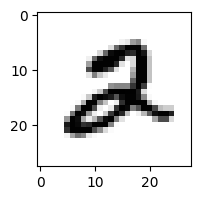

2


In [9]:
# #########################################################
# prg3

#prg3 顯示訓練資料的圖片與值
from keras.datasets import mnist

#讀取MNIST資料集
(train_feature, train_label), (test_feature, test_label) = mnist.load_data()

# 查看訓練資料
print(len(train_feature), len(train_label))   #60000 60000

# 查看維度
print(train_feature.shape, train_label.shape)   # (60000, 28, 28) (60000,)

# 顯示圖片與值
import matplotlib.pyplot as plt
def show_image(image):
    fig = plt.gcf()
    fig.set_size_inches(2,2)  #數字圖片大小
    plt.imshow(image, cmap = 'binary')  #黑白灰階顯示
    plt.show()

show_image(train_feature[5])  #顯示訓練資料第1個數字

print(train_label[5])    #顯示第1個訓練資料圖片真實值


60000 60000
(60000, 28, 28) (60000,)


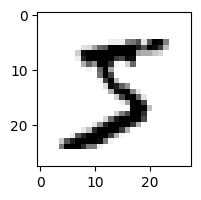

5


In [11]:
# #########################################################
# prg4

#prg4 顯示多張訓練資料的圖片與值
from keras.datasets import mnist

#讀取MNIST資料集
(train_feature, train_label), (test_feature, test_label) = mnist.load_data()

# 查看訓練資料
print(len(train_feature), len(train_label))   #60000 60000

# 查看維度
print(train_feature.shape, train_label.shape)   # (60000, 28, 28) (60000,)

# 顯示圖片與值
import matplotlib.pyplot as plt
def show_image(image):
    fig = plt.gcf()
    fig.set_size_inches(2,2)  #數字圖片大小
    plt.imshow(image, cmap = 'binary')  #黑白灰階顯示
    plt.show()
	
	# 顯示多張資料副程式，最多顯示 25張
show_image(train_feature[0])  #顯示訓練資料第1個數字

print(train_label[0])    #顯示第1個訓練資料圖片真實值


# 顯示多張圖片與值（最多25張）
def show_images_labels_predictions(images,labels,
                                  predictions,start_id,num=10):
    plt.gcf().set_size_inches(12, 14)
    if num>25: num=25 
    for i in range(0, num):
        ax=plt.subplot(5,5, 1+i)
        #顯示黑白圖片
        ax.imshow(images[start_id], cmap='binary')
        
        # 有 AI 預測結果資料, 才在標題顯示預測結果
        if( len(predictions) > 0 ) :
            title = 'ai = ' + str(predictions[i])
            # 預測正確顯示(o), 錯誤顯示(x)
            title += (' (o)' if predictions[i]==labels[i] else ' (x)') 
            title += '\nlabel = ' + str(labels[i])
        # 沒有 AI 預測結果資料, 只在標題顯示真實數值
        else :
            title = 'label = ' + str(labels[i])
            
        # X, Y 軸不顯示刻度    
        ax.set_title(title,fontsize=12) 
        ax.set_xticks([]);ax.set_yticks([])        
        start_id+=1 
    plt.show()

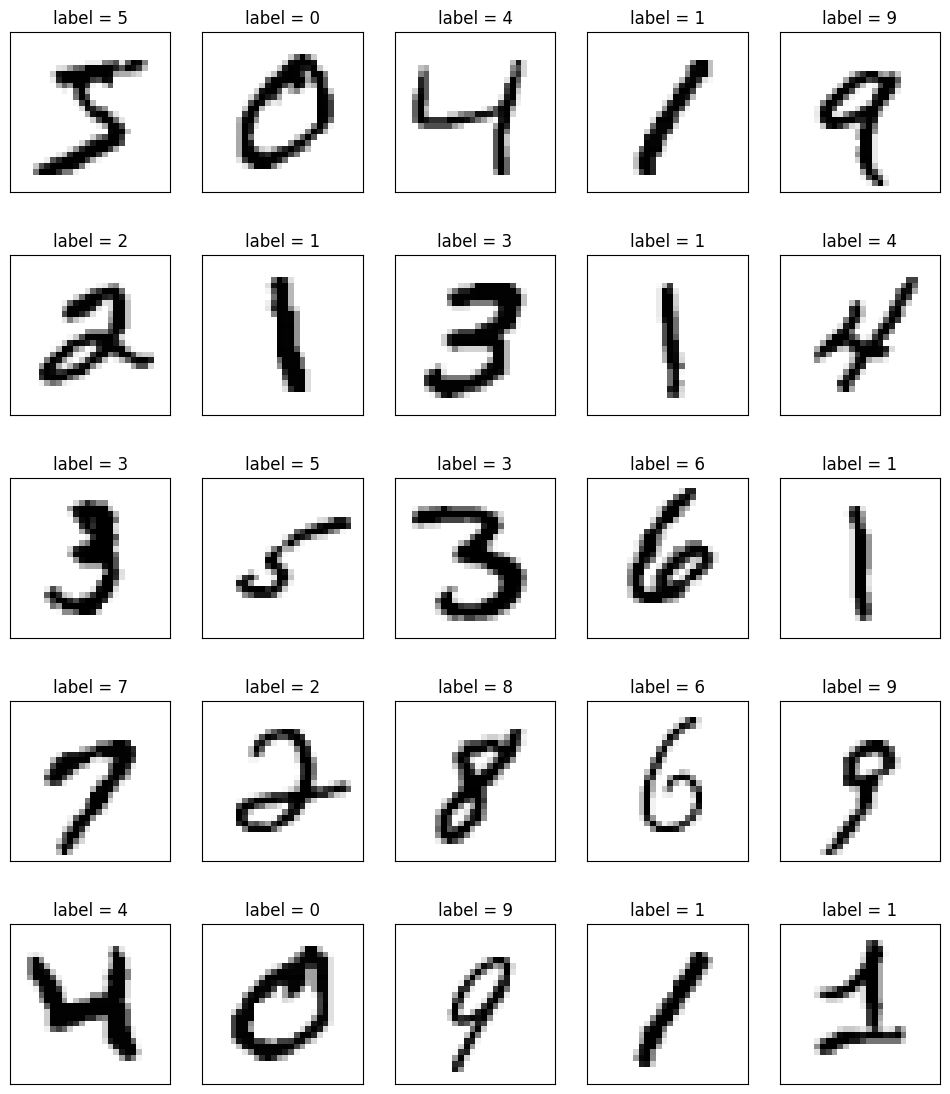

In [12]:
show_images_labels_predictions(train_feature, train_label, [], 0, 25)

In [13]:
# #########################################################
# Prg5
# 以reshape()函數將28*28的數字圖片轉換成784個數字的一維向量，再以astype將每個數字都轉換為float數字

# 以reshape()函數將28*28的數字圖片轉換成784個數字的一維向量，再以astype將每個數字都轉換為float數字
train_feature_vector = train_feature.reshape(len(train_feature),784).astype('float32')
test_feature_vector = test_feature.reshape(len(test_feature),784).astype('float32')

#查看資料
print(train_feature_vector.shape, test_feature_vector.shape)

# 顯示第1筆image資料內容。顯示0~255的浮點數。數字代表圖片中美一個點的灰階值
print(train_feature_vector[0])


(60000, 784) (10000, 784)
[  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   3.  18.
  18.  18. 126. 136. 175.  26. 166. 255. 247. 127.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.  30.  36.  94. 154. 170. 253.
 253. 253. 253. 253. 225. 172. 253. 242. 195.  64. 

In [14]:
# #########################################################
# Prg6
# Image標準化
train_feature_normalize = train_feature_vector/255
test_feature_normalize = test_feature_vector/255

#顯示第1筆的image正規化
print(train_feature_normalize[0])


[0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         

In [15]:
# #########################################################
# Prg7
# One-Hot Encoding

import numpy as np
#from keras.utils import np_utils
from keras import utils
np.random.seed(10)

train_label_onehot = utils.to_categorical(train_label)
test_label_onehot = utils.to_categorical(test_label)

print(train_label_onehot[0:5])

[[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]]


60000 60000
(60000, 28, 28) (60000,)


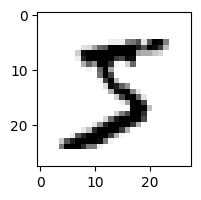

5
(60000, 784) (10000, 784)
[  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   3.  18.
  18.  18. 126. 136. 175.  26. 166. 255. 247. 127.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.  30.  36.  94. 154. 170. 253.
 253. 253. 253. 253. 225. 172. 253. 242. 195.  64

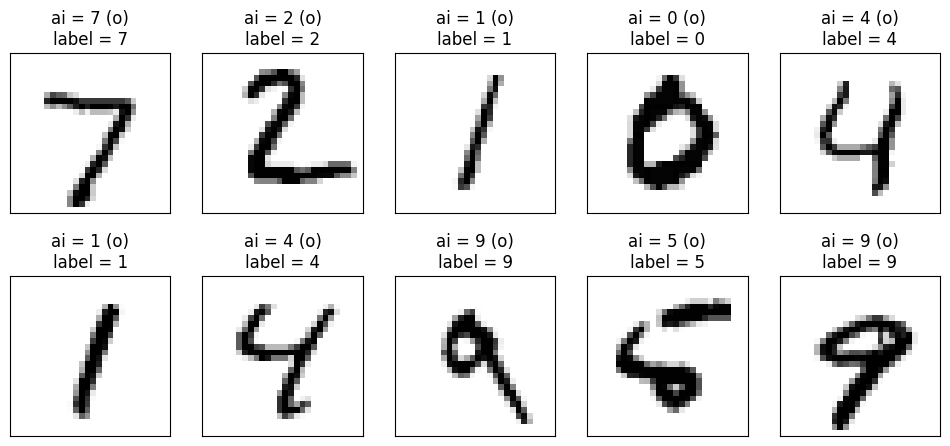

313/313 [==============================] - 0s 834us/step - loss: 0.0700 - accuracy: 0.9805

Accuracy =  0.9804999828338623


In [26]:
#####
# prg8 (完整的修正版）

#prg4 顯示多張訓練資料的圖片與值
from keras.datasets import mnist

#讀取MNIST資料集
(train_feature, train_label), (test_feature, test_label) = mnist.load_data()

# 查看訓練資料
print(len(train_feature), len(train_label))   #60000 60000

# 查看維度
print(train_feature.shape, train_label.shape)   # (60000, 28, 28) (60000,)

# 顯示圖片與值
import matplotlib.pyplot as plt
def show_image(image):
    fig = plt.gcf()
    fig.set_size_inches(2,2)  #數字圖片大小
    plt.imshow(image, cmap = 'binary')  #黑白灰階顯示
    plt.show()
	
	# 顯示多張資料副程式，最多顯示 25張
show_image(train_feature[0])  #顯示訓練資料第1個數字

print(train_label[0])    #顯示第1個訓練資料圖片真實值


# 顯示多張圖片與值（最多25張）
def show_images_labels_predictions(images,labels,
                                  predictions,start_id,num=10):
    plt.gcf().set_size_inches(12, 14)
    if num>25: num=25 
    for i in range(0, num):
        ax=plt.subplot(5,5, 1+i)
        #顯示黑白圖片
        ax.imshow(images[start_id], cmap='binary')
        
        # 有 AI 預測結果資料, 才在標題顯示預測結果
        if( len(predictions) > 0 ) :
            title = 'ai = ' + str(predictions[i])
            # 預測正確顯示(o), 錯誤顯示(x)
            title += (' (o)' if predictions[i]==labels[i] else ' (x)') 
            title += '\nlabel = ' + str(labels[i])
        # 沒有 AI 預測結果資料, 只在標題顯示真實數值
        else :
            title = 'label = ' + str(labels[i])
            
        # X, Y 軸不顯示刻度    
        ax.set_title(title,fontsize=12) 
        ax.set_xticks([]);ax.set_yticks([])        
        start_id+=1 
    plt.show()

# 以reshape()函數將28*28的數字圖片轉換成784個數字的一維向量，再以astype將每個數字都轉換為float數字

# 以reshape()函數將28*28的數字圖片轉換成784個數字的一維向量，再以astype將每個數字都轉換為float數字
train_feature_vector = train_feature.reshape(len(train_feature),784).astype('float32')
test_feature_vector = test_feature.reshape(len(test_feature),784).astype('float32')
# -----------------------------------------------------
#查看資料
print(train_feature_vector.shape, test_feature_vector.shape)

# 顯示第1筆image資料內容。顯示0~255的浮點數。數字代表圖片中美一個點的灰階值
print(train_feature_vector[0])

# -----------------------------------------------------
# Image標準化
train_feature_normalize = train_feature_vector/255
test_feature_normalize = test_feature_vector/255

#顯示第1筆的image正規化
print(train_feature_normalize[0])

# -----------------------------------------------------
# Prg7
# One-Hot Encoding

import numpy as np

# 舊版寫法
#from keras.utils import np_utils
# 新版寫法
from keras import utils
np.random.seed(10)

train_label_onehot = utils.to_categorical(train_label)
test_label_onehot = utils.to_categorical(test_label)

print(train_label_onehot[0:5])

# -----------------------------------------------------
# Prg8
#建立模型
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense

#建立模型
model = Sequential()
#輸入層：784, 隱藏層：256，輸出層：10
model.add(Dense(units=256, 
                input_dim=784, 
                kernel_initializer='normal', 
                activation='relu'))
model.add(Dense(units=10, 
                kernel_initializer='normal', 
                activation='softmax'))
#定義訓練方式
model.compile(loss='categorical_crossentropy', 
              optimizer='adam', metrics=['accuracy'])

#以(train_feature_normalize,train_label_onehot)資料訓練，
#訓練資料保留 20% 作驗證,訓練10次、每批次讀取200筆資料，顯示簡易訓練過程
train_history =model.fit(x=train_feature_normalize,
                         y=train_label_onehot,validation_split=0.2, 
                         epochs=20, batch_size=200,verbose=2)

#預測 (已經在新版tensorflow中不能用)
#prediction=model.predict_classes(test_feature_normalize)

# 新方法
# 參考來源：https://blog.csdn.net/weixin_41735859/article/details/85254323
# 两次训练时，网络结构不同。
# 第一次用的网络是在model=Sequential()下添加模块的的方法，也就是所谓的顺序模型。Sequential class可以使用model.predict_classes()的方法来实现预测；第二次用的方法，是编写好网络结构后使用model=Model()综合起来的方法，也就是Model class，无法使用model.predict_classes()，但是可以使用组合形式预测。

# np.argmax 找出最大值索引  
# 參考來源 https://blog.csdn.net/qq1483661204/article/details/78959293

prediction = (model.predict(test_feature_normalize))
prediction = np.argmax(prediction,axis=1)
prediction



# 顯示圖像、預測值、真實值 
show_images_labels_predictions(test_feature,test_label,prediction,0)

# 評估正確率
scores = model.evaluate(test_feature_normalize, test_label_onehot)
print('\nAccuracy = ',scores[1])

60000 60000
(60000, 28, 28) (60000,)


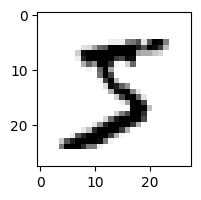

5
(60000, 784) (10000, 784)
[  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   3.  18.
  18.  18. 126. 136. 175.  26. 166. 255. 247. 127.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.  30.  36.  94. 154. 170. 253.
 253. 253. 253. 253. 225. 172. 253. 242. 195.  64

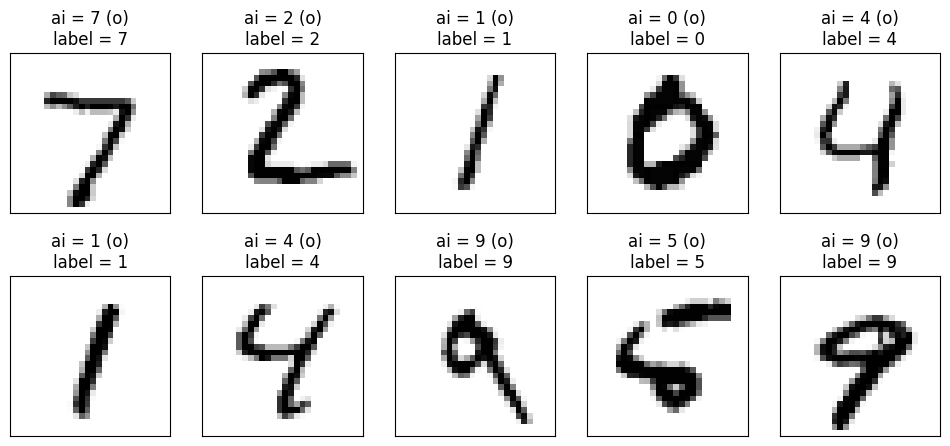

313/313 [==============================] - 0s 945us/step - loss: 0.0772 - accuracy: 0.9786

Accuracy =  0.978600025177002


In [27]:
#####
# prg8 (完整的修正版）

#prg4 顯示多張訓練資料的圖片與值
from keras.datasets import mnist

#讀取MNIST資料集
(train_feature, train_label), (test_feature, test_label) = mnist.load_data()

# 查看訓練資料
print(len(train_feature), len(train_label))   #60000 60000

# 查看維度
print(train_feature.shape, train_label.shape)   # (60000, 28, 28) (60000,)

# 顯示圖片與值
import matplotlib.pyplot as plt
def show_image(image):
    fig = plt.gcf()
    fig.set_size_inches(2,2)  #數字圖片大小
    plt.imshow(image, cmap = 'binary')  #黑白灰階顯示
    plt.show()
	
	# 顯示多張資料副程式，最多顯示 25張
show_image(train_feature[0])  #顯示訓練資料第1個數字

print(train_label[0])    #顯示第1個訓練資料圖片真實值


# 顯示多張圖片與值（最多25張）
def show_images_labels_predictions(images,labels,
                                  predictions,start_id,num=10):
    plt.gcf().set_size_inches(12, 14)
    if num>25: num=25 
    for i in range(0, num):
        ax=plt.subplot(5,5, 1+i)
        #顯示黑白圖片
        ax.imshow(images[start_id], cmap='binary')
        
        # 有 AI 預測結果資料, 才在標題顯示預測結果
        if( len(predictions) > 0 ) :
            title = 'ai = ' + str(predictions[i])
            # 預測正確顯示(o), 錯誤顯示(x)
            title += (' (o)' if predictions[i]==labels[i] else ' (x)') 
            title += '\nlabel = ' + str(labels[i])
        # 沒有 AI 預測結果資料, 只在標題顯示真實數值
        else :
            title = 'label = ' + str(labels[i])
            
        # X, Y 軸不顯示刻度    
        ax.set_title(title,fontsize=12) 
        ax.set_xticks([]);ax.set_yticks([])        
        start_id+=1 
    plt.show()

# 以reshape()函數將28*28的數字圖片轉換成784個數字的一維向量，再以astype將每個數字都轉換為float數字

# 以reshape()函數將28*28的數字圖片轉換成784個數字的一維向量，再以astype將每個數字都轉換為float數字
train_feature_vector = train_feature.reshape(len(train_feature),784).astype('float32')
test_feature_vector = test_feature.reshape(len(test_feature),784).astype('float32')
# -----------------------------------------------------
#查看資料
print(train_feature_vector.shape, test_feature_vector.shape)

# 顯示第1筆image資料內容。顯示0~255的浮點數。數字代表圖片中美一個點的灰階值
print(train_feature_vector[0])

# -----------------------------------------------------
# Image標準化
train_feature_normalize = train_feature_vector/255
test_feature_normalize = test_feature_vector/255

#顯示第1筆的image正規化
print(train_feature_normalize[0])

# -----------------------------------------------------
# Prg7
# One-Hot Encoding

import numpy as np

# 舊版寫法
#from keras.utils import np_utils
# 新版寫法
from keras import utils
np.random.seed(10)

train_label_onehot = utils.to_categorical(train_label)
test_label_onehot = utils.to_categorical(test_label)

print(train_label_onehot[0:5])

# -----------------------------------------------------
# Prg8
#建立模型
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense

#建立模型
model = Sequential()
#輸入層：784, 隱藏層：256，輸出層：10
model.add(Dense(units=256, 
                input_dim=784, 
                kernel_initializer='normal', 
                activation='relu'))
model.add(Dense(units=10, 
                kernel_initializer='normal', 
                activation='softmax'))
#定義訓練方式
model.compile(loss='categorical_crossentropy', 
              optimizer='adam', metrics=['accuracy'])

#以(train_feature_normalize,train_label_onehot)資料訓練，
#訓練資料保留 20% 作驗證,訓練10次、每批次讀取200筆資料，顯示簡易訓練過程
train_history =model.fit(x=train_feature_normalize,
                         y=train_label_onehot,validation_split=0.2, 
                         epochs=20, batch_size=200,verbose=2)

#預測 (已經在新版tensorflow中不能用)
#prediction=model.predict_classes(test_feature_normalize)

# 新方法
# 參考來源：https://blog.csdn.net/weixin_41735859/article/details/85254323
# 两次训练时，网络结构不同。
# 第一次用的网络是在model=Sequential()下添加模块的的方法，也就是所谓的顺序模型。Sequential class可以使用model.predict_classes()的方法来实现预测；第二次用的方法，是编写好网络结构后使用model=Model()综合起来的方法，也就是Model class，无法使用model.predict_classes()，但是可以使用组合形式预测。

# np.argmax 找出最大值索引  
# 參考來源 https://blog.csdn.net/qq1483661204/article/details/78959293

prediction = (model.predict(test_feature_normalize))
prediction = np.argmax(prediction,axis=1)
prediction



# 顯示圖像、預測值、真實值 
show_images_labels_predictions(test_feature,test_label,prediction,0)

# 評估正確率
scores = model.evaluate(test_feature_normalize, test_label_onehot)
print('\nAccuracy = ',scores[1])

In [28]:
# #########################################################
# Prg9
# 將模型儲存在 .HDF5檔案中

model.save('Mnist_mlp_model.keras')
print("Mnist_mlp_model.keras 模型儲存完畢")
del model

#載入模型
#load_model('Mnist_ml-Model.h5')

Mnist_mlp_model.keras 模型儲存完畢


['imagedata\\0.1.jpg', 'imagedata\\0.2.jpg', 'imagedata\\0.3.jpg', 'imagedata\\0.4.jpg', 'imagedata\\0.jpg', 'imagedata\\1.1.jpg', 'imagedata\\1.jpg', 'imagedata\\2.jpg', 'imagedata\\3.jpg', 'imagedata\\4.jpg', 'imagedata\\5.jpg', 'imagedata\\6.jpg', 'imagedata\\7.jpg', 'imagedata\\8.jpg', 'imagedata\\9.jpg']
[[[  0   0   0 ...   0   0   0]
  [  0   0   0 ...   0   0   0]
  [  0   0   0 ...   0   0   0]
  ...
  [  0   0   0 ...   0   0   0]
  [  0   0   0 ...   0   0   0]
  [  0   0   0 ...   0   0   0]]

 [[  0   0   0 ...   0 255 255]
  [  0   0   0 ...   0   0   0]
  [  0   0   0 ...   0   0   0]
  ...
  [  0   0   0 ...   0   0   0]
  [  0   0   0 ...   0   0   0]
  [  0   0   0 ...   0   0 255]]

 [[  0   0   0 ... 255 255 255]
  [  0   0   0 ...   0 255 255]
  [  0   0   0 ...   0   0 255]
  ...
  [  0   0   0 ...   0   0   0]
  [  0   0   0 ...   0   0   0]
  [  0   0   0 ...   0   0   0]]

 ...

 [[  0   0   0 ...   0   0   0]
  [  0   0   0 ...   0   0   0]
  [  0   0   0 ... 

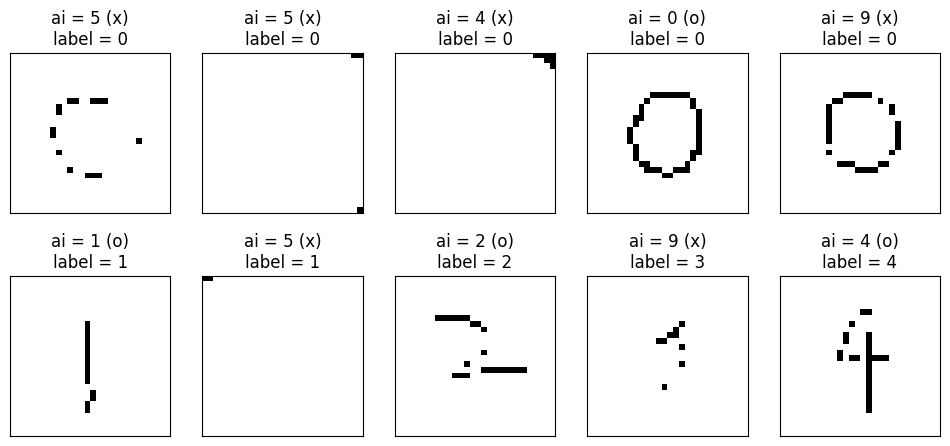

In [13]:
# #########################################################
#Prg11 載入預先訓練好的模型

import numpy as np
np.random.seed(10)
from keras.datasets import mnist
import matplotlib.pyplot as plt
from keras.models import load_model
import glob,cv2

def show_images_labels_predictions(images,labels, predictions,start_id,num=10):
    plt.gcf().set_size_inches(12, 14)
    if num>25: num=25 
    for i in range(0, num):
        ax=plt.subplot(5,5, 1+i)
        #顯示黑白圖片
        ax.imshow(images[start_id], cmap='binary')
        
        # 有 AI 預測結果資料, 才在標題顯示預測結果
        if( len(predictions) > 0 ) :
            title = 'ai = ' + str(predictions[i])
            # 預測正確顯示(o), 錯誤顯示(x)
            title += (' (o)' if predictions[i]==labels[i] else ' (x)') 
            title += '\nlabel = ' + str(labels[i])
        # 沒有 AI 預測結果資料, 只在標題顯示真實數值
        else :
            title = 'label = ' + str(labels[i])
            
        # X, Y 軸不顯示刻度    
        ax.set_title(title,fontsize=12) 
        ax.set_xticks([]);ax.set_yticks([])        
        start_id+=1 
    plt.show()

#建立測試特徵集、測試標籤
files = glob.glob("imagedata\*.jpg" )
test_feature=[]
test_label=[]
print(files)

for file in files:
    img=cv2.imread(file)
    img=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)  #灰階    
    _, img = cv2.threshold(img, 120, 255, cv2.THRESH_BINARY_INV) #轉為反相黑白 
    test_feature.append(img)
    label=file[10:11]  # "imagedata\1.jpg" 第10個字元1為label
    test_label.append(int(label))
    
test_feature=np.array(test_feature) #把串列轉為矩陣
test_label=np.array(test_label) #把串列轉為矩陣

print(test_feature)
print(test_label)

#將 Features 特徵值換為 784個 float 數字的 1 維向量
test_feature_vector = test_feature.reshape(len(test_feature), 784).astype('float32')

#Features 特徵值標準化
test_feature_normalize = test_feature_vector/255

#從 HDF5 檔案中載入模型
print("載入模型 Mnist_mlp_model.keras")
model = load_model('Mnist_mlp_model.keras')
    
#預測
#舊版
#prediction=model.predict_classes(test_feature_normalize)

prediction = (model.predict(test_feature_normalize))
prediction = np.argmax(prediction,axis=1)
prediction

#顯示圖像、預測值、真實值 
show_images_labels_predictions(test_feature,test_label,prediction,0)


In [ ]:
import numpy as np
from keras.models import load_model
from keras.datasets import mnist
from keras.utils import to_categorical

# 載入 Mnist_mlp_model.keras 模型
model = load_model('Mnist_mlp_model.keras')

# 載入測試數據
(_, _), (test_feature, test_label) = mnist.load_data()

# 正規化特徵值並重新調整形狀
test_feature_normalize = test_feature.reshape(test_feature.shape[0], 28, 28, 1).astype('float32') / 255

# 對標籤進行 one-hot 編碼
test_label_onehot = to_categorical(test_label)

# 預測
prediction = model.predict(test_feature_normalize)
prediction = np.argmax(prediction, axis=1)

# 打印預測結果
print("預測結果：", prediction)


In [2]:
import cv2
import mediapipe as mp
import math
import numpy as np
import os
from keras.models import load_model
from keras.utils import to_categorical

mp_drawing = mp.solutions.drawing_utils
mp_hands = mp.solutions.hands

folder_name = "imagedata"
os.makedirs(folder_name, exist_ok=True)

# 初始化 frame_counter 變數
frame_counter = 0

# 載入 Mnist_mlp_model.keras 模型
model = load_model('Mnist_mlp_model.keras')

# 設定模型期望的輸入大小
input_size = (28, 28)

# 根據兩點的座標，計算角度
def vector_2d_angle(v1, v2):
    v1_x = v1[0]
    v1_y = v1[1]
    v2_x = v2[0]
    v2_y = v2[1]
    try:
        angle_ = math.degrees(math.acos((v1_x * v2_x + v1_y * v2_y) / (((v1_x**2 + v1_y**2)**0.5) * ((v2_x**2 + v2_y**2)**0.5))))
    except:
        angle_ = 180
    return angle_

# 根據傳入的 21 個節點座標，得到該手指的角度
def hand_angle(hand_):
    angle_list = []
    # thumb 大拇指角度
    angle_ = vector_2d_angle(
        ((int(hand_[0][0]) - int(hand_[2][0])), (int(hand_[0][1]) - int(hand_[2][1]))),
        ((int(hand_[3][0]) - int(hand_[4][0])), (int(hand_[3][1]) - int(hand_[4][1])))
    )
    angle_list.append(angle_)
    # index 食指角度
    angle_ = vector_2d_angle(
        ((int(hand_[0][0]) - int(hand_[6][0])), (int(hand_[0][1]) - int(hand_[6][1]))),
        ((int(hand_[7][0]) - int(hand_[8][0])), (int(hand_[7][1]) - int(hand_[8][1])))
    )
    angle_list.append(angle_)
    # middle 中指角度
    angle_ = vector_2d_angle(
        ((int(hand_[0][0]) - int(hand_[10][0])), (int(hand_[0][1]) - int(hand_[10][1]))),
        ((int(hand_[11][0]) - int(hand_[12][0])), (int(hand_[11][1]) - int(hand_[12][1])))
    )
    angle_list.append(angle_)
    # ring 無名指角度
    angle_ = vector_2d_angle(
        ((int(hand_[0][0]) - int(hand_[14][0])), (int(hand_[0][1]) - int(hand_[14][1]))),
        ((int(hand_[15][0]) - int(hand_[16][0])), (int(hand_[15][1]) - int(hand_[16][1])))
    )
    angle_list.append(angle_)
    # pink 小拇指角度
    angle_ = vector_2d_angle(
        ((int(hand_[0][0]) - int(hand_[18][0])), (int(hand_[0][1]) - int(hand_[18][1]))),
        ((int(hand_[19][0]) - int(hand_[20][0])), (int(hand_[19][1]) - int(hand_[20][1])))
    )
    angle_list.append(angle_)
    return angle_list

# 根據手指角度的串列內容，返回對應的手勢名稱
def hand_pos(finger_angle):
    f1 = finger_angle[0]   # 大拇指角度
    f2 = finger_angle[1]   # 食指角度
    f3 = finger_angle[2]   # 中指角度
    f4 = finger_angle[3]   # 無名指角度
    f5 = finger_angle[4]   # 小拇指角度

    # 小於 50 表示手指伸直，大於等於 50 表示手指捲縮
    if f1 >= 50 and f2 < 50 and f3 >= 50 and f4 >= 50 and f5 >= 50:
        return '1'
    else:
        return ''

cap = cv2.VideoCapture(0)  # 讀取攝影機
fontFace = cv2.FONT_HERSHEY_SIMPLEX  # 印出文字的字型
lineType = cv2.LINE_AA  # 印出文字的邊框

# mediapipe 啟用偵測手掌
with mp_hands.Hands(
    model_complexity=0,
    min_detection_confidence=0.5,
    min_tracking_confidence=0.5) as hands:

    if not cap.isOpened():
        print("Cannot open camera")
        exit()
    w, h = 800, 600  # 影像尺寸
    draw = np.zeros((h, w, 4), dtype='uint8')  # 繪製全黑背景，尺寸和影像相同
    dots = []  # 使用 dots 空串列記錄繪圖座標點
    cv2.circle(draw, (40, 40), 20, (0, 0, 255, 255), -1)  # 在画布上绘制一个红色实心圆形
    cv2.circle(draw, (100, 40), 20, (0, 255, 0, 255), -1)  # 在画布上绘制一个绿色实心圆形
    cv2.circle(draw, (160, 40), 20, (255, 0, 0, 255), -1)  # 在画布上绘制一个蓝色实心圆形

    color = (0, 0, 255, 255)  # 設定預設顏色為紅色
    while True:
        ret, img = cap.read()
        img = cv2.resize(img, (w, h))  # 縮小尺寸，加快處理效率
        img = cv2.flip(img, 1)
        if not ret:
            print("Cannot receive frame")
            break
        img2 = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # 偵測手勢的影像轉換成 RGB 色彩
        img = cv2.cvtColor(img, cv2.COLOR_BGR2BGRA)  # 畫圖的影像轉換成 BGRA 色彩
        results = hands.process(img2)  # 偵測手勢
        if results.multi_hand_landmarks:
            for hand_landmarks in results.multi_hand_landmarks:
                finger_points = []  # 記錄手指節點座標的串列
                for i in hand_landmarks.landmark:
                    # 將 21 個節點換算成座標，記錄到 finger_points
                    x = i.x * w
                    y = i.y * h
                    finger_points.append((x, y))
                if finger_points:
                    finger_angle = hand_angle(finger_points)  # 計算手指角度，回傳長度為 5 的串列
                    text = hand_pos(finger_angle)  # 取得手勢所回傳的內容
                    if text == '1':
                        fx = int(finger_points[8][0])  # 如果手勢為 1，記錄食指末端的座標
                        fy = int(finger_points[8][1])
                        if fy >= 20 and fy <= 60 and fx >= 20 and fx <= 60:
                            color = (0, 0, 255, 255)  # 如果食指末端碰到紅色，顏色改成紅色
                        elif fy >= 20 and fy <= 60 and fx >= 80 and fx <= 120:
                            color = (0, 255, 0, 255)  # 如果食指末端碰到綠色，顏色改成綠色
                        elif fy >= 20 and fy <= 60 and fx >= 140 and fx <= 180:
                            color = (255, 0, 0, 255)  # 如果食指末端碰到藍色，顏色改成藍色
                        else:
                            dots.append([fx, fy])  # 記錄食指座標
                            dl = len(dots)
                            if dl > 1:
                                dx1 = dots[dl - 2][0]
                                dy1 = dots[dl - 2][1]
                                dx2 = dots[dl - 1][0]
                                dy2 = dots[dl - 1][1]
                                cv2.line(draw, (dx1, dy1), (dx2, dy2), color, 5)  # 在黑色畫布上畫圖
                    else:
                        dots = []  # 如果換成別的手勢，清空 dots

        # 將影像和黑色畫布合成
        for j in range(w):
            img[:, j, 0] = img[:, j, 0] * (1 - draw[:, j, 3] / 255) + draw[:, j, 0] * (draw[:, j, 3] / 255)
            img[:, j, 1] = img[:, j, 1] * (1 - draw[:, j, 3] / 255) + draw[:, j, 1] * (draw[:, j, 3] / 255)
            img[:, j, 2] = img[:, j, 2] * (1 - draw[:, j, 3] / 255) + draw[:, j, 2] * (draw[:, j, 3] / 255)

        cv2.imshow('oxxostudio', img)
        keyboard = cv2.waitKey(5)
        if keyboard == ord('q'):
            break
        # 按下 r 重置畫面
        if keyboard == ord('r'):
            draw = np.zeros((h, w, 4), dtype='uint8')
            cv2.circle(draw, (40, 40), 20, (0, 0, 255, 255), -1)  # 在画布上绘制一个红色实心圆形
            cv2.circle(draw, (100, 40), 20, (0, 255, 0, 255), -1)  # 在画布上绘制一个绿色实心圆形
            cv2.circle(draw, (160, 40), 20, (255, 0, 0, 255), -1)  # 在画布上绘制一个蓝色实心圆形

        hand_roi = np.zeros((100, 100, 3), dtype=np.uint8)  # 初始值可以根據你的需求調整
        # 按下 a 進行截圖
        if keyboard == ord('a'):
            frame_counter += 1
            
            # 檢查 dots 中是否有足夠的座標點
            if len(dots) >= 2:
                hand_roi = img[dots[0][1]:dots[1][1], dots[0][0]:dots[1][0]]
                # 檢查手部區域是否為空
                if hand_roi.shape[0] == 0 or hand_roi.shape[1] == 0:
                    print("Empty hand_roi. Skipping prediction.")
                    continue


            # 將手部區域轉為灰度圖並調整大小
            hand_roi_gray = cv2.cvtColor(cv2.resize(hand_roi, input_size), cv2.COLOR_BGR2GRAY)
            # 將灰度圖轉換為模型的輸入格式
            hand_roi_input = hand_roi_gray.reshape(1, input_size[0] * input_size[1]) / 255.0
            # 使用模型進行預測
            prediction = model.predict(hand_roi_input)
            # 獲取預測結果
            predicted_label = np.argmax(prediction)
            # 在畫面上印出預測結果
            cv2.putText(img, f'Predicted Digit: {predicted_label}', (img.shape[1] -380, 30), fontFace, 1, (255, 255, 255, 255), 2, lineType)

            filename = os.path.join(folder_name, f"frame_{frame_counter:03d}.jpg")
            cv2.imwrite(filename, img)
            print(f"Image {filename} saved.")
        #else:
           # print("Not enough points in dots. Skipping prediction.")

cap.release()
cv2.destroyAllWindows()




1/1 [==============================] - 0s 103ms/step
Image imagedata\frame_001.jpg saved.


In [1]:
import cv2
import mediapipe as mp
import math
import numpy as np
import os
from keras.models import load_model
from keras.utils import to_categorical

mp_drawing = mp.solutions.drawing_utils
mp_hands = mp.solutions.hands

folder_name = "imagedata"
os.makedirs(folder_name, exist_ok=True)

# 初始化 frame_counter 變數
frame_counter = 0

# 載入 Mnist_mlp_model.keras 模型
model = load_model('Mnist_mlp_model.keras')

# 設定模型期望的輸入大小
input_size = (28, 28)

# 根據兩點的座標，計算角度
def vector_2d_angle(v1, v2):
    v1_x = v1[0]
    v1_y = v1[1]
    v2_x = v2[0]
    v2_y = v2[1]
    try:
        angle_ = math.degrees(math.acos((v1_x * v2_x + v1_y * v2_y) / (((v1_x**2 + v1_y**2)**0.5) * ((v2_x**2 + v2_y**2)**0.5))))
    except:
        angle_ = 180
    return angle_

# 根據傳入的 21 個節點座標，得到該手指的角度
def hand_angle(hand_):
    angle_list = []
    # thumb 大拇指角度
    angle_ = vector_2d_angle(
        ((int(hand_[0][0]) - int(hand_[2][0])), (int(hand_[0][1]) - int(hand_[2][1]))),
        ((int(hand_[3][0]) - int(hand_[4][0])), (int(hand_[3][1]) - int(hand_[4][1])))
    )
    angle_list.append(angle_)
    # index 食指角度
    angle_ = vector_2d_angle(
        ((int(hand_[0][0]) - int(hand_[6][0])), (int(hand_[0][1]) - int(hand_[6][1]))),
        ((int(hand_[7][0]) - int(hand_[8][0])), (int(hand_[7][1]) - int(hand_[8][1])))
    )
    angle_list.append(angle_)
    # middle 中指角度
    angle_ = vector_2d_angle(
        ((int(hand_[0][0]) - int(hand_[10][0])), (int(hand_[0][1]) - int(hand_[10][1]))),
        ((int(hand_[11][0]) - int(hand_[12][0])), (int(hand_[11][1]) - int(hand_[12][1])))
    )
    angle_list.append(angle_)
    # ring 無名指角度
    angle_ = vector_2d_angle(
        ((int(hand_[0][0]) - int(hand_[14][0])), (int(hand_[0][1]) - int(hand_[14][1]))),
        ((int(hand_[15][0]) - int(hand_[16][0])), (int(hand_[15][1]) - int(hand_[16][1])))
    )
    angle_list.append(angle_)
    # pink 小拇指角度
    angle_ = vector_2d_angle(
        ((int(hand_[0][0]) - int(hand_[18][0])), (int(hand_[0][1]) - int(hand_[18][1]))),
        ((int(hand_[19][0]) - int(hand_[20][0])), (int(hand_[19][1]) - int(hand_[20][1])))
    )
    angle_list.append(angle_)
    return angle_list

# 根據手指角度的串列內容，返回對應的手勢名稱
def hand_pos(finger_angle):
    f1 = finger_angle[0]   # 大拇指角度
    f2 = finger_angle[1]   # 食指角度
    f3 = finger_angle[2]   # 中指角度
    f4 = finger_angle[3]   # 無名指角度
    f5 = finger_angle[4]   # 小拇指角度

    # 小於 50 表示手指伸直，大於等於 50 表示手指捲縮
    if f1 >= 50 and f2 < 50 and f3 >= 50 and f4 >= 50 and f5 >= 50:
        return '1'
    else:
        return ''

cap = cv2.VideoCapture(0)  # 讀取攝影機
if not cap.isOpened():
    print("Error: Could not open camera.")
    exit()

fontFace = cv2.FONT_HERSHEY_SIMPLEX  # 印出文字的字型
lineType = cv2.LINE_AA  # 印出文字的邊框

# mediapipe 啟用偵測手掌
with mp_hands.Hands(
    model_complexity=0,
    min_detection_confidence=0.5,
    min_tracking_confidence=0.5) as hands:

    while True:
        ret, img = cap.read()
    
        if not ret:
            print("Error: Could not read frame. Exiting...")
            break

        img = cv2.resize(img, (800, 600))  # 縮小
        img = cv2.flip(img, 1)

        img2 = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # 偵測手勢的影像轉換成 RGB 色彩
        img = cv2.cvtColor(img, cv2.COLOR_BGR2BGRA)  # 畫圖的影像轉換成 BGRA 色彩
        results = hands.process(img2)  # 偵測手勢
        if results.multi_hand_landmarks:
            for hand_landmarks in results.multi_hand_landmarks:
                finger_points = []  # 記錄手指節點座標的串列
                for i in hand_landmarks.landmark:
                    # 將 21 個節點換算成座標，記錄到 finger_points
                    x = i.x * 800
                    y = i.y * 600
                    finger_points.append((x, y))
                if finger_points:
                    finger_angle = hand_angle(finger_points)  # 計算手指角度，回傳長度為 5 的串列
                    text = hand_pos(finger_angle)  # 取得手勢所回傳的內容
                    if text == '1':
                        fx = int(finger_points[8][0])  # 如果手勢為 1，記錄食指末端的座標
                        fy = int(finger_points[8][1])
                        if fy >= 20 and fy <= 60 and fx >= 20 and fx <= 60:
                            color = (0, 0, 255, 255)  # 如果食指末端碰到紅色，顏色改成紅色
                        elif fy >= 20 and fy <= 60 and fx >= 80 and fx <= 120:
                            color = (0, 255, 0, 255)  # 如果食指末端碰到綠色，顏色改成綠色
                        elif fy >= 20 and fy <= 60 and fx >= 140 and fx <= 180:
                            color = (255, 0, 0, 255)  # 如果食指末端碰到藍色，顏色改成藍色
                        else:
                            dots.append([fx, fy])  # 記錄食指座標
                            dl = len(dots)
                            if dl > 1:
                                dx1 = dots[dl - 2][0]
                                dy1 = dots[dl - 2][1]
                                dx2 = dots[dl - 1][0]
                                dy2 = dots[dl - 1][1]
                                cv2.line(draw, (dx1, dy1), (dx2, dy2), color, 5)  # 在黑色畫布上畫圖
                    else:
                        dots = []  # 如果換成別的手勢，清空 dots

        # 將影像和黑色畫布合成
        for j in range(800):
            img[:, j, 0] = img[:, j, 0] * (1 - draw[:, j, 3] / 255) + draw[:, j, 0] * (draw[:, j, 3] / 255)
            img[:, j, 1] = img[:, j, 1] * (1 - draw[:, j, 3] / 255) + draw[:, j, 1] * (draw[:, j, 3] / 255)
            img[:, j, 2] = img[:, j, 2] * (1 - draw[:, j, 3] / 255) + draw[:, j, 2] * (draw[:, j, 3] / 255)

        # 在畫面上印出預測結果
        if len(dots) >= 2:
            hand_roi = img[dots[0][1]:dots[1][1], dots[0][0]:dots[1][0]]
            # 檢查手部區域是否為空
            if hand_roi.shape[0] == 0 or hand_roi.shape[1] == 0:
                print("Empty hand_roi. Skipping prediction.")
            else:
                # 將手部區域轉為灰度圖並調整大小
                hand_roi_gray = cv2.cvtColor(cv2.resize(hand_roi, input_size), cv2.COLOR_BGR2GRAY)
                # 將灰度圖轉換為模型的輸入格式
                hand_roi_input = hand_roi_gray.reshape(1, input_size[0] * input_size[1]) / 255.0
                # 使用模型進行預測
                prediction = model.predict(hand_roi_input)
                # 獲取預測結果
                predicted_label = np.argmax(prediction)
                # 在畫面上印出預測結果
                cv2.putText(img, f'Predicted Digit: {predicted_label}', (img.shape[1] - 380, 30), fontFace, 1, (255, 255, 255, 255), 2, lineType)

        cv2.imshow('oxxostudio', img)
        keyboard = cv2.waitKey(5)
        if keyboard == ord('q'):
            break
        # 按下 r 重置畫面
        if keyboard == ord('r'):
            draw = np.zeros((600, 800, 4), dtype='uint8')
            cv2.circle(draw, (40, 40), 20, (0, 0, 255, 255), -1)  # 在画布上绘制一个红色实心圆形
            cv2.circle(draw, (100, 40), 20, (0, 255, 0, 255), -1)  # 在画布上绘制一个绿色实心圆形
            cv2.circle(draw, (160, 40), 20, (255, 0, 0, 255), -1)  # 在画布上绘制一个蓝色实心圆形

cap.release()
cv2.destroyAllWindows()



NameError: name 'draw' is not defined

['imagedata\\0.jpg', 'imagedata\\1.jpg', 'imagedata\\2.jpg', 'imagedata\\3.jpg', 'imagedata\\4.jpg', 'imagedata\\5.jpg', 'imagedata\\6.jpg', 'imagedata\\7.jpg', 'imagedata\\8.jpg', 'imagedata\\9.jpg']
載入模型 Mnist_mlp_model.keras
1/1 [==============================] - 0s 91ms/step


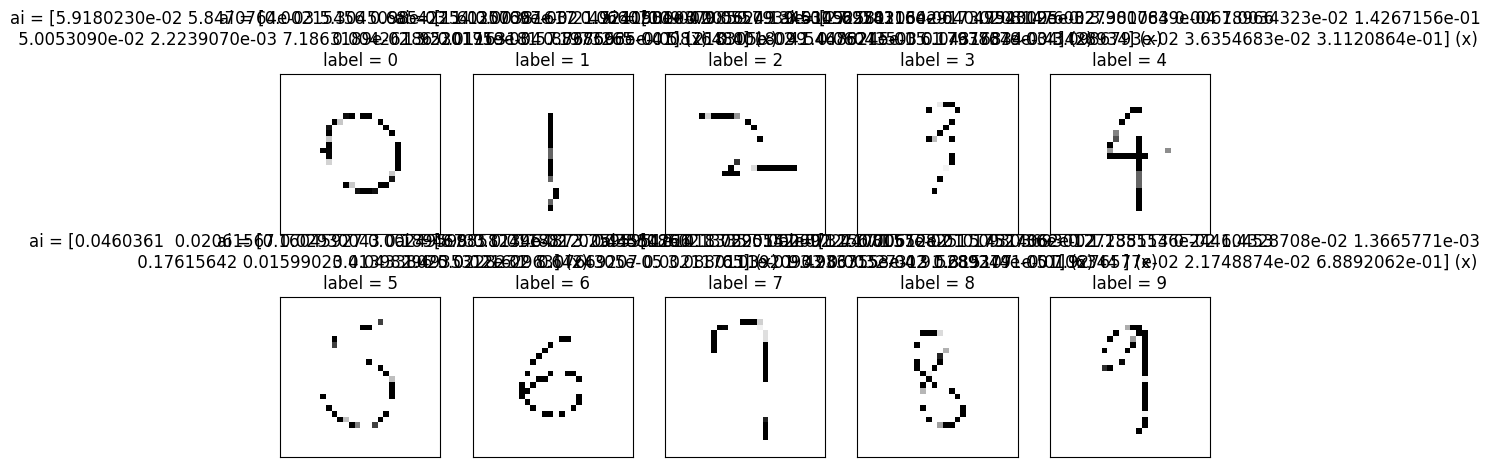

In [1]:
import numpy as np
np.random.seed(10)
from keras.models import load_model
import glob
import cv2
import matplotlib.pyplot as plt

def show_images_labels_predictions(images, labels, predictions, start_id, num=10):
    plt.gcf().set_size_inches(12, 14)
    if num > 25:
        num = 25 
    for i in range(0, num):
        ax = plt.subplot(5, 5, 1+i)
        ax.imshow(images[start_id], cmap='binary')
        if len(predictions) > 0:
            title = 'ai = ' + str(predictions[i])
            title += (' (o)' if np.array_equal(predictions[i], labels[i]) else ' (x)')
            title += '\nlabel = ' + str(labels[i])
        else:
            title = 'label = ' + str(labels[i])
        ax.set_title(title, fontsize=12) 
        ax.set_xticks([]); ax.set_yticks([])        
        start_id += 1 
    plt.show()

# 建立測試特徵集、測試標籤
files = glob.glob("imagedata/*.jpg")
test_feature = []
test_label = []

print(files)

# 調整的目標尺寸
target_size = (28, 28)

for file in files:
    img = cv2.imread(file)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)  # 灰階    
    _, img = cv2.threshold(img, 120, 255, cv2.THRESH_BINARY_INV)  # 轉為反相黑白 
    img = cv2.resize(img, target_size)  # 調整尺寸
    test_feature.append(img)
    label = file[10:11]  # "imagedata\1.jpg" 第10個字元1為label
    test_label.append(int(label))
    
test_feature = np.array(test_feature)  # 把串列轉為矩陣
test_label = np.array(test_label)  # 把串列轉為矩陣

# 將 Features 特徵值換為 784個 float 數字的 1 維向量
test_feature_vector = test_feature.reshape(len(test_feature), 784).astype('float32')

# Features 特徵值標準化
test_feature_normalize = test_feature_vector / 255

# 從 HDF5 檔案中載入模型
print("載入模型 Mnist_mlp_model.keras")
model = load_model('Mnist_mlp_model.keras')

# 預測
# 預測
prediction = model.predict(test_feature_normalize)
predicted_classes = np.argmax(prediction, axis=1)


# 顯示圖像、預測值、真實值 
show_images_labels_predictions(test_feature, test_label, prediction, 0)


In [9]:
import cv2
import mediapipe as mp
import math
import numpy as np
import os
from keras.models import load_model
from keras.utils import to_categorical

mp_drawing = mp.solutions.drawing_utils
mp_hands = mp.solutions.hands

folder_name = "imagedata"
os.makedirs(folder_name, exist_ok=True)

# 初始化 frame_counter 變數
frame_counter = 0

# 載入 Mnist_mlp_model.keras 模型
model = load_model('Mnist_mlp_model.keras')

# 設定模型期望的輸入大小
input_size = (28, 28)

# 初始化 draw 變數
draw = np.zeros((600, 800, 4), dtype='uint8')

# 根據兩點的座標，計算角度
def vector_2d_angle(v1, v2):
    v1_x = v1[0]
    v1_y = v1[1]
    v2_x = v2[0]
    v2_y = v2[1]
    try:
        angle_ = math.degrees(math.acos((v1_x * v2_x + v1_y * v2_y) / (((v1_x**2 + v1_y**2)**0.5) * ((v2_x**2 + v2_y**2)**0.5))))
    except:
        angle_ = 180
    return angle_

# 根據傳入的 21 個節點座標，得到該手指的角度
def hand_angle(hand_):
    angle_list = []
    # thumb 大拇指角度
    angle_ = vector_2d_angle(
        ((int(hand_[0][0]) - int(hand_[2][0])), (int(hand_[0][1]) - int(hand_[2][1]))),
        ((int(hand_[3][0]) - int(hand_[4][0])), (int(hand_[3][1]) - int(hand_[4][1])))
    )
    angle_list.append(angle_)
    # index 食指角度
    angle_ = vector_2d_angle(
        ((int(hand_[0][0]) - int(hand_[6][0])), (int(hand_[0][1]) - int(hand_[6][1]))),
        ((int(hand_[7][0]) - int(hand_[8][0])), (int(hand_[7][1]) - int(hand_[8][1])))
    )
    angle_list.append(angle_)
    # middle 中指角度
    angle_ = vector_2d_angle(
        ((int(hand_[0][0]) - int(hand_[10][0])), (int(hand_[0][1]) - int(hand_[10][1]))),
        ((int(hand_[11][0]) - int(hand_[12][0])), (int(hand_[11][1]) - int(hand_[12][1])))
    )
    angle_list.append(angle_)
    # ring 無名指角度
    angle_ = vector_2d_angle(
        ((int(hand_[0][0]) - int(hand_[14][0])), (int(hand_[0][1]) - int(hand_[14][1]))),
        ((int(hand_[15][0]) - int(hand_[16][0])), (int(hand_[15][1]) - int(hand_[16][1])))
    )
    angle_list.append(angle_)
    # pink 小拇指角度
    angle_ = vector_2d_angle(
        ((int(hand_[0][0]) - int(hand_[18][0])), (int(hand_[0][1]) - int(hand_[18][1]))),
        ((int(hand_[19][0]) - int(hand_[20][0])), (int(hand_[19][1]) - int(hand_[20][1])))
    )
    angle_list.append(angle_)
    return angle_list

# 根據手指角度的串列內容，返回對應的手勢名稱
def hand_pos(finger_angle):
    f1 = finger_angle[0]   # 大拇指角度
    f2 = finger_angle[1]   # 食指角度
    f3 = finger_angle[2]   # 中指角度
    f4 = finger_angle[3]   # 無名指角度
    f5 = finger_angle[4]   # 小拇指角度

    # 小於 50 表示手指伸直，大於等於 50 表示手指捲縮
    if f1 >= 50 and f2 < 50 and f3 >= 50 and f4 >= 50 and f5 >= 50:
        return '1'
    else:
        return ''

cap = cv2.VideoCapture(0)  # 讀取攝影機
if not cap.isOpened():
    print("Error: Could not open camera.")
    exit()

fontFace = cv2.FONT_HERSHEY_SIMPLEX  # 印出文字的字型
lineType = cv2.LINE_AA  # 印出文字的邊框

# mediapipe 啟用偵測手掌
with mp_hands.Hands(
    model_complexity=0,
    min_detection_confidence=0.5,
    min_tracking_confidence=0.5) as hands:

    while True:
        ret, img = cap.read()
        img = cv2.resize(img, (800, 600))  # 縮小
        img = cv2.flip(img, 1)
        if not ret:
            print("Cannot receive frame")
            break

        img2 = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # 偵測手勢的影像轉換成 RGB 色彩
        img = cv2.cvtColor(img, cv2.COLOR_BGR2BGRA)  # 畫圖的影像轉換成 BGRA 色彩
        results = hands.process(img2)  # 偵測手勢
        if results.multi_hand_landmarks:
            for hand_landmarks in results.multi_hand_landmarks:
                finger_points = []  # 記錄手指節點座標的串列
                for i in hand_landmarks.landmark:
                    # 將 21 個節點換算成座標，記錄到 finger_points
                    x = i.x * 800
                    y = i.y * 600
                    finger_points.append((x, y))
                if finger_points:
                    finger_angle = hand_angle(finger_points)  # 計算手指角度，回傳長度為 5 的串列
                    text = hand_pos(finger_angle)  # 取得手勢所回傳的內容
                    if text == '1':
                        fx = int(finger_points[8][0])  # 如果手勢為 1，記錄食指末端的座標
                        fy = int(finger_points[8][1])
                        if fy >= 20 and fy <= 60 and fx >= 20 and fx <= 60:
                            color = (0, 0, 255, 255)  # 如果食指末端碰到紅色，顏色改成紅色
                        elif fy >= 20 and fy <= 60 and fx >= 80 and fx <= 120:
                            color = (0, 255, 0, 255)  # 如果食指末端碰到綠色，顏色改成綠色
                        elif fy >= 20 and fy <= 60 and fx >= 140 and fx <= 180:
                            color = (255, 0, 0, 255)  # 如果食指末端碰到藍色，顏色改成藍色
                        else:
                            dots.append([fx, fy])  # 記錄食指座標
                            dl = len(dots)
                            if dl > 1:
                                dx1 = dots[dl - 2][0]
                                dy1 = dots[dl - 2][1]
                                dx2 = dots[dl - 1][0]
                                dy2 = dots[dl - 1][1]
                                cv2.line(draw, (dx1, dy1), (dx2, dy2), color, 5)  # 在黑色畫布上畫圖
                    else:
                        dots = []  # 如果換成別的手勢，清空 dots

        # 將影像和黑色畫布合成
        for j in range(800):
            img[:, j, 0] = img[:, j, 0] * (1 - draw[:, j, 3] / 255) + draw[:, j, 0] * (draw[:, j, 3] / 255)
            img[:, j, 1] = img[:, j, 1] * (1 - draw[:, j, 3] / 255) + draw[:, j, 1] * (draw[:, j, 3] / 255)
            img[:, j, 2] = img[:, j, 2] * (1 - draw[:, j, 3] / 255) + draw[:, j, 2] * (draw[:, j, 3] / 255)

        # 在畫面上印出預測結果
        if len(dots) >= 2:
            hand_roi = img[dots[0][1]:dots[1][1], dots[0][0]:dots[1][0]]
            # 檢查手部區域是否為空
            if hand_roi.shape[0] == 0 or hand_roi.shape[1] == 0:
                print("Empty hand_roi. Skipping prediction.")
            else:
                # 將手部區域轉為灰度圖並調整大小
                hand_roi_gray = cv2.cvtColor(cv2.resize(hand_roi, input_size), cv2.COLOR_BGR2GRAY)
                # 將灰度圖轉換為模型的輸入格式
                hand_roi_input = hand_roi_gray.reshape(1, input_size[0] * input_size[1]) / 255.0
                # 使用模型進行預測
                prediction = model.predict(hand_roi_input)
                # 獲取預測結果
                predicted_label = np.argmax(prediction)
                # 在畫面上印出預測結果
                cv2.putText(img, f'Predicted Digit: {predicted_label}', (img.shape[1] - 380, 30), fontFace, 1, (255, 255, 255, 255), 2, lineType)

        cv2.imshow('oxxostudio', img)
        keyboard = cv2.waitKey(5)
        if keyboard == ord('q'):
            break
        # 按下 r 重置畫面
        if keyboard == ord('r'):
            draw = np.zeros((600, 800, 4), dtype='uint8')
            cv2.circle(draw, (40, 40), 20, (0, 0, 255, 255), -1)  # 在画布上绘制一个红色实心圆形
            cv2.circle(draw, (100, 40), 20, (0, 255, 0, 255), -1)  # 在画布上绘制一个绿色实心圆形
            cv2.circle(draw, (160, 40), 20, (255, 0, 0, 255), -1)  # 在画布上绘制一个蓝色实心圆形

cap.release()
cv2.destroyAllWindows()



Empty hand_roi. Skipping prediction.
Empty hand_roi. Skipping prediction.
Empty hand_roi. Skipping prediction.
Empty hand_roi. Skipping prediction.
Empty hand_roi. Skipping prediction.
Empty hand_roi. Skipping prediction.
Empty hand_roi. Skipping prediction.
Empty hand_roi. Skipping prediction.
Empty hand_roi. Skipping prediction.
Empty hand_roi. Skipping prediction.
Empty hand_roi. Skipping prediction.
Empty hand_roi. Skipping prediction.
Empty hand_roi. Skipping prediction.
Empty hand_roi. Skipping prediction.
Empty hand_roi. Skipping prediction.
Empty hand_roi. Skipping prediction.
Empty hand_roi. Skipping prediction.
Empty hand_roi. Skipping prediction.
Empty hand_roi. Skipping prediction.
Empty hand_roi. Skipping prediction.
Empty hand_roi. Skipping prediction.
Empty hand_roi. Skipping prediction.
Empty hand_roi. Skipping prediction.
Empty hand_roi. Skipping prediction.
Empty hand_roi. Skipping prediction.
Empty hand_roi. Skipping prediction.
Empty hand_roi. Skipping prediction.
E